
# Regresión logística y descenso del gradiente en Python
### Beatriz Cárdaba Rico
#### 12/11/2020

__Objetivo: Programar el descenso del gradiente en Python en base al archivo de datos facilitado en clase. Explicar el notebook con el máximo grado de detalle para trabajar en el entendimiento del algoritmo.__

En el presente notebook se implementarán diferentes algoritmos que nos permitirán el cálculo y la visualización del descenso del gradiente, en este caso se está realizado con el data set "4_1_data" aunque será sencillo realizar los cambios para calcular el descenso del gradiente de cualquier otro data set.
También, los algoritmos están preparados para cambiar fácilmente la tasa de aprendizaje y el número máximo de iteraciones que queremos establecer.


### Índice:
- Importar librerías y datos.
    - Importar librerías
    - Importar data set
- EDA
    - Descripción de datos
    - Tranformaciones y organización de datos
    - Visualización de datos.
- Descenso del Gradiente
    - Normalización de las variables predictivas.
    - Creación de coeficientes iniciales aleatorios.
    - Establecemos la función sigmoide para $\hat{y}$.
    - Función de Costes.
    - Redefinimos los Betas.
    - Código DESCENSO GRADIENTE
    - Visualización gáfica
- Referencias

## Importar libreías y datos:

### Importar librerías: 
En esta ocasión solo vamos a utilizar las librías pandas, matplot para las visualizaciones y random para gener datos aleatorios para los coeficientes.

In [3]:
#Load required libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import random

### Importar Data Set Utilizado
En este caso imporamos el data set indicado:

In [4]:
# importamos dataset
data = pd.read_csv('../../lab_01/data/01_raw/4_1_data.csv')

Visualizamos que los datos se han cargado correctamente

In [5]:
data.head(5) # visualizamos las 5 primeras filas de la tabla

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Suponga que usted es un administrador de una universidad y quiere saber la posibilidad de admisión de cada solicitante en base a sus resultados en dos exámenes. Tiene datos históricos de candidatos anteriores que pueden ser utilizados como datos de formación para la regresión logística. Hay que construir un modelo de clasificación que estime la probabilidad de admisión de cada solicitante en la universidad.

En los datos tenemos registros de la puntuación de los dos exámenes de los solicitantes, score-1 y score-2, e identifican si el solicitante obtuvo la admisión o no (1 - si obtuvo la admisión 0 - en caso contrario).


## EDA

Se realiza un análisis exploratorio de los datos para ver sus caraterísticas:

In [6]:
data.shape 

(100, 3)

El data set cuenta con 100 filas y tres columnas

In [7]:
data.describe()

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Organización y transformación de datos:
Dividimos el data set inicial para separar las variables predictivas de la variable response:

####  Variables predictivas:
Para crear las variables predictivas seleccionamos todas las columnas de nuestros datos menos la última, en  este caso nos quedamos con score-1 y score-2. La llamamos X

In [8]:
# Vaariables predictivas:
# en este caso necesitamos seleccionar todas las columnas menos la última, si cambiamos el data set habría que cambiarlo 
X = data.iloc[:, :-1] 

X.head() # visualizamos que se han seleccionado las variables que nos interesan

,score-1,score-2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


#### Response Variable:
En este caso la Response Variable es label, que identifica con 1 a los admitidos y con 0 a los no admitidos, vamos a llamarla Y.

In [9]:
# Response variable:
# En este caso seleccionamos la que se llama label, si cambiamos el data set habría que cambiarlo
Y = np.array(data[['label']]) #
Y[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

### Visualización de datos

In [10]:
# diferenciamos los admitidos de los no Admitidos
# Los admitidos son aquellos en los que la respone variable = 1
admitidos = data.loc[Y == 1] 
# Los NO admitidos son aquellos en los que la respone variable = 
no_admitidos = data.loc[Y == 0]

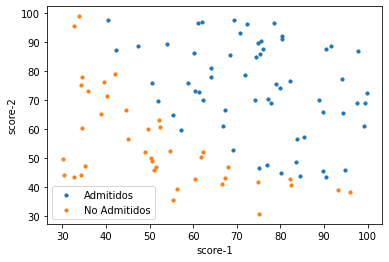

In [11]:
plt.scatter(admitidos.iloc[:, 0], admitidos.iloc[:, 1], s=10, label='Admitidos')
plt.scatter(no_admitidos.iloc[:, 0], no_admitidos.iloc[:, 1], s=10, label='No Admitidos')
plt.legend()
plt.xlabel("score-1")
plt.ylabel("score-2")
plt.show()

En el gráfico podemos distinguir aquellos alumnos que han sido admitidos y cuales no asociados a su score-1 y score-2

En este caso tenemos dos variables predcitivas : score-1 y score-2 y una response variable, label. 

Esta es la ecuación que representa el modelo que queremos estudiar:


$\hat{y} = \sigma(w_1x_1 + w_2*x_2 + b)$ 

Donde x1 y x2 son las variables predictivas, w1 y w2 sus respectivos coeficientes, y b el término independiente

Establecemos las predictor variables (X) y la response variable (Y) de este modelo con las variables :

## Descenso del Gradiente

#### Normalizamos la variable X:
El objetivo que perseguimos normalizando las variables es que sea cual sea las dimensiones de nuestra muestra los valores estén normalizados para poder utilizar el algoritmo indistinatamente con cualquier data frame y facilitar así la comprensión e interpretación del error

In [12]:
# Para normalizar la variable creamos una función lambda, normalizamos cada valor de X
# usamos tambien rec para  utilizar cada valor del array en cada caso.
# la fomrula aplicada para normalizar: (valor - media de los valores)/la desviación típica de los valores.
# apply + la función lamba hace que se aplique para todo X
X_new = X.apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)


In [13]:
#Visualizamos el tipo de objeto que hemos creado:
type(X_new)

pandas.core.frame.DataFrame

In [14]:
# visualizamos la cabecera de X

list(X_new)

['score-1', 'score-2']

In [15]:
# Pasamos los datos de X de dataframe a array para poder operar facilmente con el array de Y
X_new = np.array(X_new)
X_new[0:5]

array([[-1.59421626,  0.63514139],
       [-1.81710142, -1.20148852],
       [-1.53132516,  0.35948329],
       [-0.28068724,  1.08092281],
       [ 0.68806193,  0.49090485]])

### Creación de coeficientes aleatorios:
Como hemos comentando anteriormente existen dos coeficientes de las variables predictivas W1,W2 y una variable independiente b. Vamos a crear valores aleatorios para estos coeficientes para poder comenzar con el descenso del gradiente en un punto concreto.

In [16]:
# importamos la librería random que nos geneara datos aleatorios
import random 

Creamos una función que nos genere aleatoriamente los valores iniciales de W1, W2 y b:

In [17]:
def initialize_betas(dim): # necesitamos tantas betas como la dim, la dimension la especificaremos en cada caso
    b = random.random() # necesitamos una b
    w = np.random.rand(dim) # neceistamos dos w
    return b,w 




In [18]:
# Visualizamos la b ,la W1 y W2 para la dimesión del data set que tenemos en cada caso.
# en este caso la dimension cuenta con 2 variables predictoras, por lo que hay dos W
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.2718513953812751 [0.28570023 0.51204032]


In [19]:
# Confirmamos que coincide el número de W(coeficinctes de la variables predictoras) con el número de variables predictoras
w.shape

(2,)

### Definimos una función sigmoide para predecir $\hat{y}$

Primero definos el concepto de función sigmoide:

La función sigmoide transforma los valores introducidos a una escala (0,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a 0. Esta característica nos permite asociar el resultado de las regresiones logísticas con una probabilidad. También es conocidad como función de activación.

Visualizamos la función sigmoide:

Text(0, 0.5, 'sigmoid(z)')

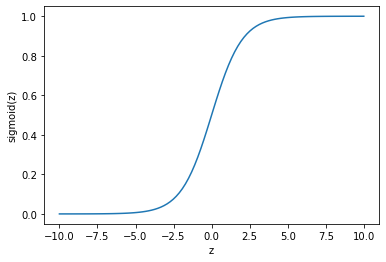

In [20]:
z = np.linspace(-10, 10, 100)  # parametros que vamos a visualizar en esta función sigmoide, de -10 a 10
def sigmoid(z):
    # La función de activación nos permite visualizar cualquier valor de 0 a 1
    return 1/(1 + np.exp(-z))

a = sigmoid(z)
plt.plot(z, a) 
plt.xlabel("z") 
plt.ylabel("sigmoid(z)")

Creamos la función sigmoide asociada a los coeficiencites y a las variables predictivas

In [21]:
# introducimos el témino indepednidete b y los coeficientes W1 y W2 de la regresión.
def sigmoid(b, w ,X_new): 
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

Ahora realizamos una predicción de $\hat{y}$  a través de la función sigmoide en la que hemos introducido los parámetros que hemos calculado antes aleatoriamente 

In [22]:
# calculamos la  predicción resultante de la función sigmoide con los coeficientes aleatorios
y_hat = sigmoid(b,w,X_new) 

y_hat[0:5]

array([0.53534133, 0.29681615, 0.50460521, 0.67811773, 0.67256164])

### Función de costes:  función que mide el error de predicción del modelo en el conjunto de datos
Para calcula la funicón de costes hay que sumar los errores que se han producido en la predicción de $\hat{y}$ respecto de los valores reales de Y. 

Esta es la función de los errores de cada observación, llamada función de pérdidas:
$\ell(y, \hat{y}) = -(y·log(\hat{y}) + (1 - y)log(1 - \hat{y})$
El objetivo de la predicción es que $\hat{y}$ sea parecida a __*y*__, en otro caso penalizaremos el resultado.

En la situación perfeca en la que el suceso se cumpla $\hat{y}$ = 1, y la predicción sea la correcta $\hat{y}$ = __*y*__, el LOSS ERROR (error de cada observación) valdrá 0. Llegamos a este resultado sustituyendo en la función log(y_hat) = log(1) = 0.

En cada caso habrá que calcular la función de pérdias para cada valor de __*y*__ y  $\hat{y}$

La función de costes es la suma de todas las funciones de pérdias:

$\jmath(w, b) = \frac{1}{n}\sum_{1}^{n}\ell(y^{i} \hat{y}^{i}) = -\frac{1}{n}\sum_{1}^{n}((y^{i}log(\hat{y}^{i}) + (y^{i} +1)log(1 - \hat{y}^{i}))$


A continuación, se calcula la función de costes para la predicción de $\hat{y}$, con los coeficientes W1,W2 y la variable independiete b que hemos calculado aleatoriamente, respecto de __*y*__. 

In [23]:
# función de costes de la prediciccion y_hat respecto de los valores reales de 
def get_cost( y, y_hat):
    return -1/(len(y)) * np.sum(y * np.log(y_hat) + (1-y) * (np.log(1-y_hat)))


Relacionamos cada parte de la fórmula con su nomenclatura en python:

   -  $(y^{i}log(\hat{y}^{i})$ en la función de python es (y * np.log(y_hat)). Multiplicamos y por el log de $\hat{y}$ . Si $\hat{y}$ = 1 entonces (y * np.log(y_hat)) = 0
   - $(1 - y^{i})log(1 - \hat{y}^{i}))$ en la función de python correaponde a (1-y) * (np.log(1-y_hat)). En esta parte se multiplica la diferencia de 1 menos el valor real por el log de la diferenica entre 1 e  $\hat{y}$
   
Sumamos los resultados de ambas expresiones y se divide entre el numero de observaciones. Todo ello se multiplica por -1

Calculamos el error de la $\hat{y}$ predecida respecto de Y para una observación concreta. Llamamos a este valor current cost:

In [24]:

Y=Y.reshape(len(Y), ) # indicamos que Y debe tener tantos valores como la longitud del array que hemos formado
# la función current cost es el coste individual para un Y determinado y su predicción y_hat
current_cost= get_cost(Y,y_hat)
Y.shape

(100,)

### Redefinimos los betas. w y b
Anteriormente hemos utilizado unos betas aleatrorios para generar los valores de y_hat. Ahora vamos a establecer una función que sea capaz de redefinir los parámetros a partir de los parámetros de la predicción.

Esta función será necesaria para que se vuelvan a calcular las betas en cada iteración del descenso del gradiente. El objetivo es  que genere nuevos betas para los Y y los $\hat{y}$ de cada caso. En el descenso de  gradiente (definido más adelante) los betas deben ir cambiando en cada iteración para irnos acercando más al error = 0

In [25]:
# definimos la función que irá cambiando los betas en cada iteración para conseguir acercarnos a la prendiente = 0
def update_beta (b_0, w_0 , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0

# la función devuelve los nuevos betas que aplicaremos a la siguiente iteracion que reducirá el error respecto de la anterior

In [26]:
# seleccionamos un alpha:
alpha = 0.1

type(y_hat)
#(X_new).shape

numpy.ndarray

In [27]:
# aplicamos la función que nos devuelva los parámetros actualizados.
b,w = update_beta (b,w, Y, y_hat,X_new, alpha)

b.shape

()

In [28]:
#visualizamos los nuevos parámetros, la b es el nuevo término independiente y el conjunto de las W son los coeficientes de X
b,w

(0.275602237392318, array([0.30740178, 0.52531806]))

### Definimos el descenso de gradiente:

El objetivo es mimnimizar los errores que nos indica la función de costes, para ello deberemos hacer diferentes iteraciones en los que irán cambiando nuestros betas para que el error se acerque a cero. Las matemáticas nos indican que ese hecho se produce cuando la pendiente = 0. 

Es decir, queremos generar iteraciones con diferentes betas en las que cada vez nos vayamos acercando más a una pendiente que sea cero, ya que minimizará el error.

Para estas iteraciones es importante establecer la Tasa de Aprendizaje: determina el siguinte punto en el que se va a realizar la siguiente iteración. A mayor tasa de aprendizaje mayor distancia entre las iteraciones, esto puede producir que en uno de estos "saltos" nos pasemos del error mínimo conseguido. En este caso: Tasa de Aprendizaje = Alpha

Que la predicción de y_hat esté definida por la función sigmoidea es lo que permite que en cada iteración las betas generadas provoquen que el error de esa iteración sea menor que el de la anterior, ya que la pendiente de la función se va acercando a 0.


#### Definimos el descenso del gradiente el Python
Para el cálculo del descenso del gradiente en python primero necesitamos establecer un alpha ( tasa de aprendizaje) y en este caso, un número máximo de iteraciones. 
La función será un cálculo de los errores iteradamente cambiando sus betas para acercarnos en cada nueva iteración al error = 0.
Para ello en la función debemos introducir el error, dado por la funcion de costes (current_cost) de cada iteración en función de cada y_hat predecida por la funcion sigmoidea. 
Debemos introducir la actualización de las betas en cada iteración. Se calcula mediante la función que hemos creado anteriormente, update_beta, que tiene en cuenta las betas de la iteración anterior para  majorarlas y acercarse a error=0 en la siguiente iteración.

La salida que elegimos de la función es que en cada 10 iteraciones nos muestre el número de iteración y el valor de la funcion de costes en esa iteración, es decir el error. Vamos a ver que en cada iteración el error va disminuyendo.
Al final, nos indica el erro de la iteración final, y las betas utilizadas en esta última iteración, que hemos defenidio en num_iterations.

En primer lugar vamos a definir la función para 2000 iteraciones con un alpha= 0.1

In [29]:
# definimos el número máximo de iteraciones
num_iterations = 2001 # ponemos un número más para que en la salida aperezca el 1500
# definimos la tasa de aprendizaje:
alpha = 0.1

all_costs = []
b,w = initialize_betas(X_new.shape[1]) # aplica la función de recalculo de las betas en cada iteración 
print("initial guess of b and w: " , b ,w) # para conocer las betas iniciales 

for each_iter in range (num_iterations ): # para cada iteración en el rango limite que hemos estabolecido en num_iterations
    y_hat = sigmoid(b, w , X_new) # calculamos la Y_Hat con los betas que toque en cada iteracion
    current_cost = get_cost (Y, y_hat) # calculamos el coste de cada iteración (diferencia entre y e y_hat en cada iteración)
    prev_b = b # la b usada en la predicción anterior es la que se tendra en cuenta para mejorar la siguiente iteración
    prev_w = w # las W usada en la predicción anterior es la que se tendra en cuenta para mejorar la siguiente iteración 
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha) # que recalcule las betas con los datos de cada iteración 
    all_costs.append(current_cost) # todos los costes es la suma de los costes de cada iteración
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1 
    # queremos que impirma los resultados cada 10 iteraciones. imprime el numero de iteración y su coste
    
    
print("Final estimates of b and q are: ", b,w) # imprimimos los ultimos beta que ha utilizado en la última iteracion

initial guess of b and w:  0.18886143994573235 [0.6556393  0.85724179]
Iteration:  0 Cost:  0.409393525157294
Iteration:  10 Cost:  0.38186892435903147
Iteration:  20 Cost:  0.3609266172762253
Iteration:  30 Cost:  0.3444523671241621
Iteration:  40 Cost:  0.3311340961747227
Iteration:  50 Cost:  0.32012309542252204
Iteration:  60 Cost:  0.3108494958092675
Iteration:  70 Cost:  0.3029177750130326
Iteration:  80 Cost:  0.2960452838745863
Iteration:  90 Cost:  0.29002477142939326
Iteration:  100 Cost:  0.2847007847067407
Iteration:  110 Cost:  0.27995436129583473
Iteration:  120 Cost:  0.27569283186535926
Iteration:  130 Cost:  0.2718428603213656
Iteration:  140 Cost:  0.26834558811034326
Iteration:  150 Cost:  0.2651531781260257
Iteration:  160 Cost:  0.2622263095768878
Iteration:  170 Cost:  0.2595323317005332
Iteration:  180 Cost:  0.2570438821930443
Iteration:  190 Cost:  0.2547378388758531
Iteration:  200 Cost:  0.25259451398515936
Iteration:  210 Cost:  0.2505970276109922
Iteration:

Observamos como va disminuyendo el error en cada iteración hasta el error de la última iteración, también observamos como han cambiado las betas de la última iteración respecto de la primera.
#### Representamos gráficamente el resultado.

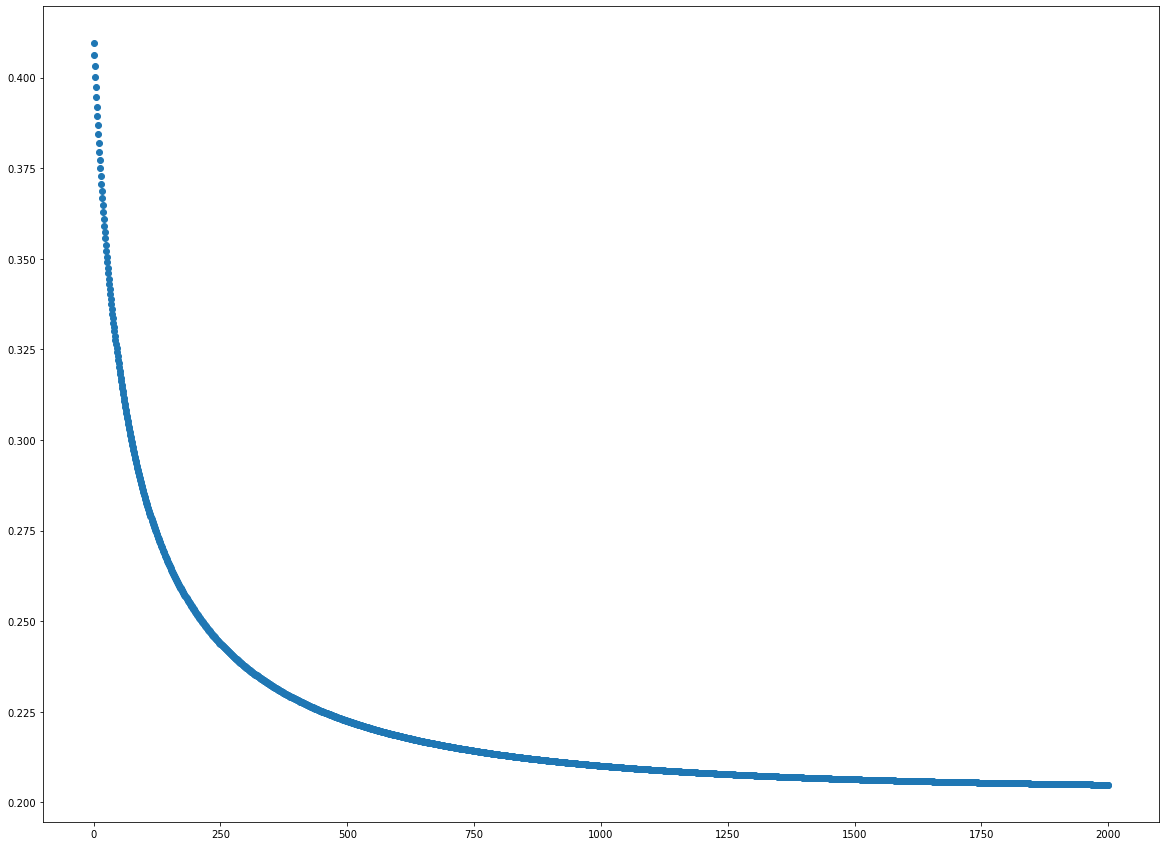

In [30]:
plt.figure(figsize=(20,15))
plt.scatter( range(num_iterations), all_costs)
plt.show()

#len(range(each_iter))

En este gráfico observamos como en las primeras iteraciones disminuye mucho el error sin embargo, luego se estabiliza y en cada nueva iteración el error disminuye menos porcentualmente.

__Calculamos el gradiente con menos número de iteraciones__
Vamos a calcular de nuevo la función disminuyendo el alpha y el número de iteraciones para ver mejor como descenciende el error en cada iteración

In [31]:
# Para alpha =0.1
num_iterations = 1501
alpha = 0.1

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = update_beta (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.32358234864242086 [0.1085219  0.87764607]
Iteration:  0 Cost:  0.5133310953945647
Iteration:  10 Cost:  0.4530538862572846
Iteration:  20 Cost:  0.4115333345959426
Iteration:  30 Cost:  0.3817512593980194
Iteration:  40 Cost:  0.35955252474109217
Iteration:  50 Cost:  0.3424280566604343
Iteration:  60 Cost:  0.3288186421087496
Iteration:  70 Cost:  0.317724766448736
Iteration:  80 Cost:  0.3084856540700365
Iteration:  90 Cost:  0.3006514064262365
Iteration:  100 Cost:  0.2939071157850222
Iteration:  110 Cost:  0.2880266343578516
Iteration:  120 Cost:  0.28284367708313163
Iteration:  130 Cost:  0.27823330741713276
Iteration:  140 Cost:  0.27409979357360903
Iteration:  150 Cost:  0.2703684644139679
Iteration:  160 Cost:  0.26698013218940786
Iteration:  170 Cost:  0.2638871972235075
Iteration:  180 Cost:  0.26105087658811327
Iteration:  190 Cost:  0.2584391980082923
Iteration:  200 Cost:  0.25602552397690764
Iteration:  210 Cost:  0.25378744938425196
Iteration

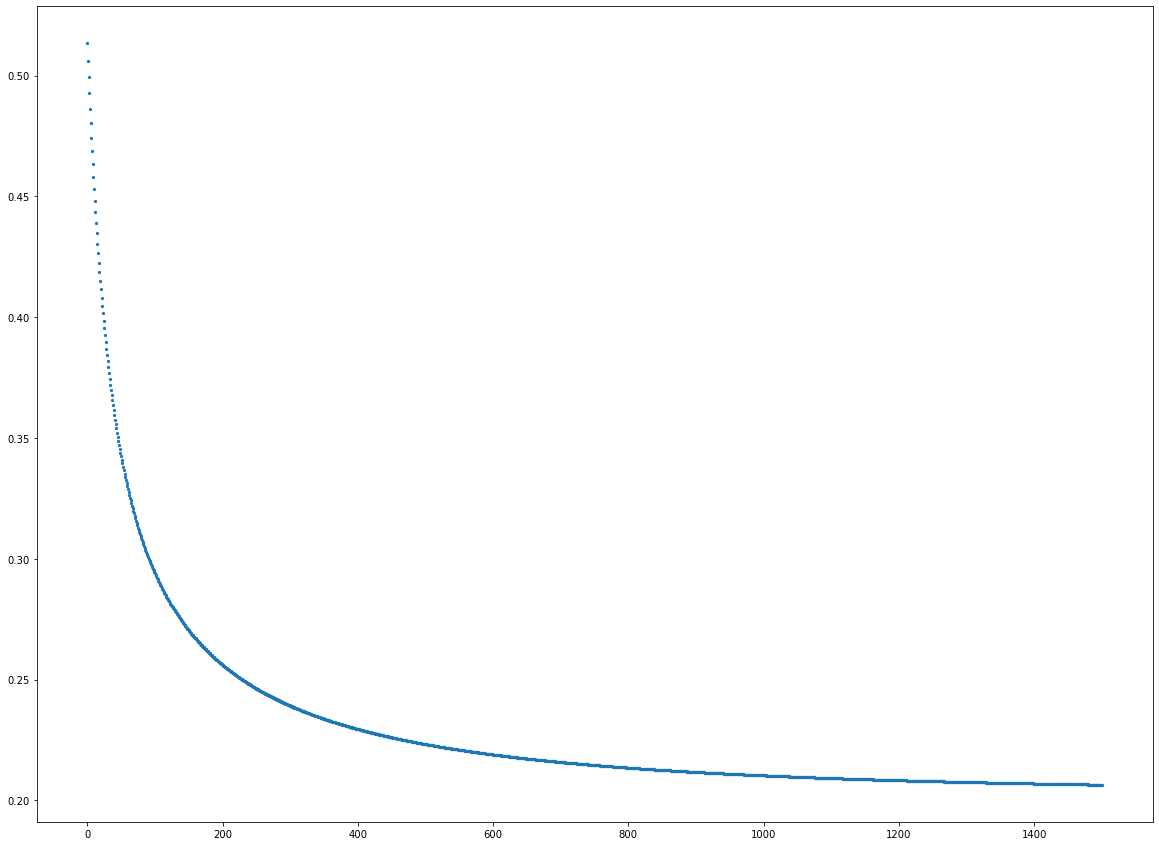

In [32]:
plt.figure(figsize=(20,15))
plt.scatter( range(num_iterations), all_costs,s = 5)
plt.show()

Observamos que con menos iteraciones somo capaces de visualizar como la curva se estabiliza entre las iteraciones 1000 y 1500 para un alpha = 0.1.

Podemos aumentar y disminuir como queramos el número de iteraciones y el alpha para observar como van  cambiando los errores, solo hay que camiar los datos: *num_iterations = ; alpha =*

Disminuir el alpha es dar pasos más pequeñitos por lo que a mismo número de iteraciones con menor alpha llegará probablememnte a un error más alejado de cero, que con un alpha mayor.

Por el contrario, si al mismo alpha aumentas el número de iteraciones llegarás a un error más cercano a 0 que cono menos iteraciones.

El objetivo es encontrar un alpha y un número de iteraciones óptimo que lleguen al nivel en el que el error disminuye muy poco en cada interación siguiente.


## Referencias:
 - https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
 - https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
 - https://github.com/nikadeap/Gradient-Descent-Algorithm-for-Logistic-Regression
 - https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd
 - https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220
 - https://www.analyticslane.com/2018/12/21/implementacion-del-metodo-descenso-del-gradiente-en-python/